# kmeans

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans


# 对图中坐标轴进行扩展
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

### 生成三种数据并可视化
1、类别个数相同，方差相同  

2、类别个数相同，方差不同  

3、类别个数不同，方差相同  


In [5]:
N = 400
centers = 4
data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
data2, y2 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1, 2.5, 0.5, 2), random_state=2)
data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))
y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)

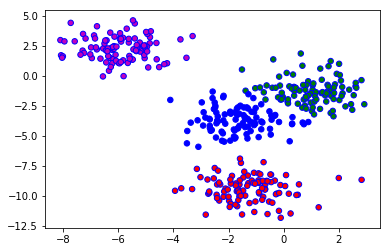

In [6]:
# 可视化，s大小，c指定颜色，可以为数组，cmap颜色映射，和c数字对应，edgecolors边缘颜色
cm = matplotlib.colors.ListedColormap(list('rgbm'))
plt.scatter(data[:,0],data[:,1],s=30,c=y,cmap=cm,edgecolors='b')
plt.show()

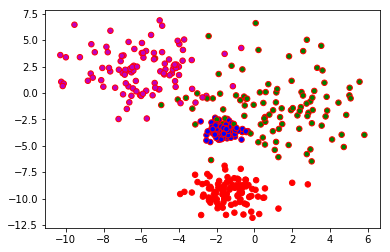

In [7]:
cm = matplotlib.colors.ListedColormap(list('rgbm'))
plt.scatter(data2[:,0],data2[:,1],s=30,c=y2,cmap=cm,edgecolors='r')
plt.show()

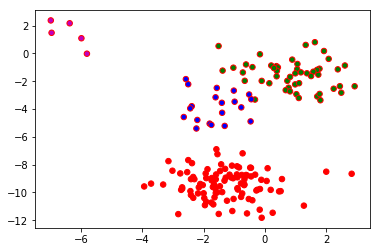

In [8]:
plt.scatter(data3[:,0],data3[:,1],s=30,c=y3,cmap=cm,edgecolors='r')
plt.show()

## k-means++
kmeans++算法同原始的K-means算法的区别就在于初始中心点的选择。

原始K-means算法在开始随机选取数据集中K个点作为聚类中心，这样做的缺点就是，如果初始点的位置选择不当（例如都在一个簇里面），那么其最终的聚类结果将是非常糟糕的。（若簇中含有异常点，则会导致均值偏离严重）

K-means++则按照如下思路选择K个初始中心点：假设已经选取了n个初始聚类中心(0< n < K，同Kmeans一样，其K值都是已知的)，则在选取第n+1个聚类中心时：距离当前**已有的**n个聚类中心越远的点会有更高的概率被选为第n+1个聚类中心。在选取第一个聚类中心(n=1)时同样通过随机的方法。当然这也非常符合我们直觉：聚类中心当然是相互离得越远越好

综述：k-means++与原始K-means的却别就在于初始点的处理上，确定好初始点之后，其余步骤都同Kmeans一样

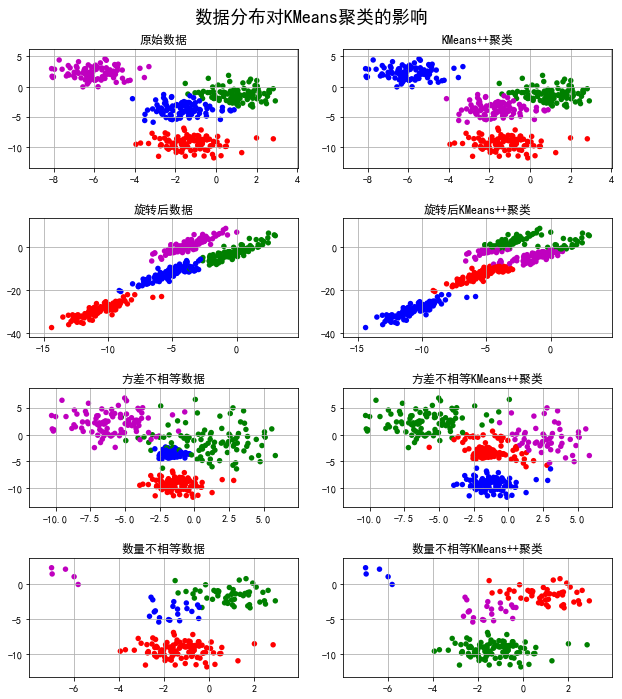

In [9]:
cls = KMeans(n_clusters=4, init='k-means++')
y_hat = cls.fit_predict(data)
y2_hat = cls.fit_predict(data2)
y3_hat = cls.fit_predict(data3)

m = np.array(((1, 1), (1, 3)))
data_r = data.dot(m)
y_r_hat = cls.fit_predict(data_r)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbm'))

plt.figure(figsize=(9, 10), facecolor='w')
plt.subplot(421) # 分格4行2列，在第1个格子里画图
plt.title(u'原始数据')
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(422)
plt.title(u'KMeans++聚类')
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(423)
plt.title(u'旋转后数据')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(424)
plt.title(u'旋转后KMeans++聚类')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(425)
plt.title(u'方差不相等数据')
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(426)
plt.title(u'方差不相等KMeans++聚类')
plt.scatter(data2[:, 0], data2[:, 1], c=y2_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(427)
plt.title(u'数量不相等数据')
plt.scatter(data3[:, 0], data3[:, 1], s=30, c=y3, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(428)
plt.title(u'数量不相等KMeans++聚类')
plt.scatter(data3[:, 0], data3[:, 1], c=y3_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.tight_layout(2, rect=(0, 0, 1, 0.97))
plt.suptitle(u'数据分布对KMeans聚类的影响', fontsize=18)
# https://github.com/matplotlib/matplotlib/issues/829
# plt.subplots_adjust(top=0.92)
plt.show()
# plt.savefig('cluster_kmeans')

  第一列图是原始数据，第二列图是聚类之后的数据
  
1、可见，有时候改变原始的分布之后（如进行旋转后），聚类效果有可能变差。当然如果原始数据本身就不好聚类的情况了，旋转之后可能聚类效果好一些  
2、方差不一样，最后的聚类效果大不相同，因为kmeans是有一个内在假设的：样本服从方差相同的高斯分布，所以kmeans中心点更新的时候只更新了均值，  
没有更新方差

# DBSCAN（调参）  
调整最小样本数和半径两个参数，聚类结果为-1，说明是离群点

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

In [11]:
# a = np.arange(10)
# b = a.reshape(2,5)
# np.zeros_like(b,dtype=bool)

[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3  4] 聚类簇的个数为： 5
[-1  0] 聚类簇的个数为： 1
[-1  0  1] 聚类簇的个数为： 2
[-1  0  1  2  3] 聚类簇的个数为： 4


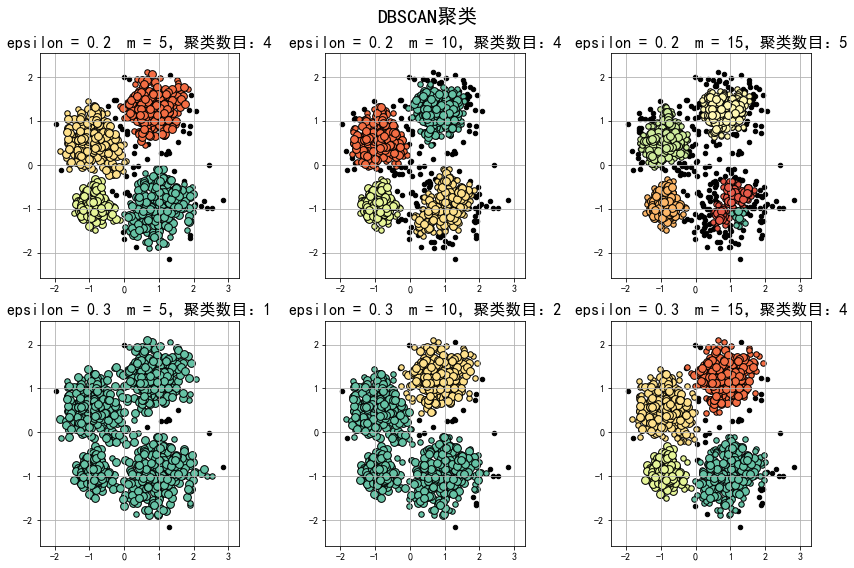

In [12]:
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
data = StandardScaler().fit_transform(data)
# 数据的参数：(epsilon, min_sample)
params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8), facecolor='w')
plt.suptitle(u'DBSCAN聚类', fontsize=20)

for i in range(6):
    eps, min_samples = params[i]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    y_hat = model.labels_
    
    core_indices = np.zeros_like(y_hat, dtype=bool)
    # core_sample_indices_:核心点的索引
    core_indices[model.core_sample_indices_] = True

    y_unique = np.unique(y_hat)
    # 其中噪声点用-1标记
    n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
    print(y_unique, '聚类簇的个数为：', n_clusters)

    plt.subplot(2, 3, i+1)
    # plt.cm.Spectral：遍历使用颜色，生成y_unique.size种不同的颜色
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
    #print('clrs:',clrs,'----')
    for k, clr in zip(y_unique, clrs):
        cur = (y_hat == k)
        if k == -1:
            # 把标记为-1的都取出来，用黑色填充
            plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
            continue
        plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
        # 核心点尺寸加大为60
        plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
    # 设置坐标范围
    x1_min, x2_min = np.min(data, axis=0)
    x1_max, x2_max = np.max(data, axis=0)
    x1_min, x1_max = expand(x1_min, x1_max)
    x2_min, x2_max = expand(x2_min, x2_max)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    # 绘制网格
    plt.grid(True)
    plt.title(u'epsilon = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=16)

#图像外部边缘的调整可以使用plt.tight_layout()进行自动控制，此方法不能够很好的控制图像间的间隔。
#如果想同时控制图像外侧边缘以及图像间的空白区域，使用命令：
#plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8，hspace=0.2, wspace=0.3)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [15]:
# colors = plt.cm.Spectral(np.arange(5))
# print("5种不同的颜色: ",colors)